In [2]:
import urllib.request
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

In [3]:

url = "http://37.9.3.250/download/files.synop/27/27514.01.01.2016.01.01.2022.1.0.0.ru.utf8.00000000.csv.gz"
filename = "weather.csv.gz"
urllib.request.urlretrieve(url, filename)

('weather.csv.gz', <http.client.HTTPMessage at 0x7f5479dd53d0>)

In [4]:
data = pd.read_csv(
    filename, 
    skiprows=6, 
    encoding='utf-8', 
    compression='gzip', 
    sep=';', 
    index_col=False,
    parse_dates=[0], 
    dayfirst=True, 
    decimal='.',
)

In [5]:
data['date'] = data['Местное время в Шереметьево / им. А. С. Пушкина (аэропорт)']

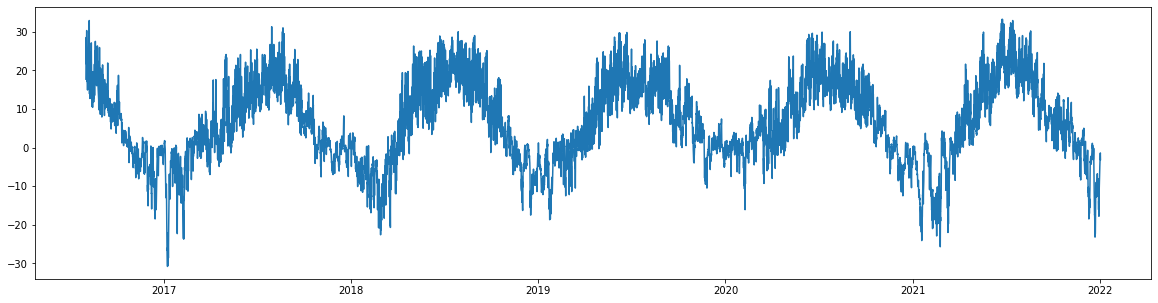

In [6]:
#get temperature graph

x = data['date']
y = data['T']

plt.figure(figsize=(20, 5))
plt.plot(x, y)

In [7]:
# Remove blanks in data
condition_bad = data['T'].isna()
# data[condition_bad]

In [8]:
data = data.dropna(subset=['T'])

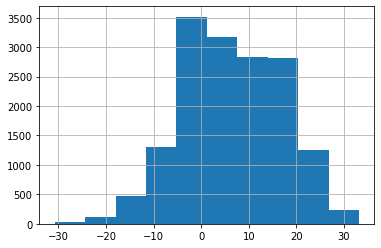

In [9]:
data['T'].hist()

In [10]:
data['T'].quantile(0.05), data['T'].quantile(0.95)

(-10.364999999999998, 23.0)

In [11]:
data['date'] = pd.to_datetime(data['Местное время в Шереметьево / им. А. С. Пушкина (аэропорт)'], dayfirst=True)

In [12]:
#generate new features

data['dayofyear'] = data['date'].dt.dayofyear
data['cos_dayofyear'] = np.cos((data['dayofyear'] - 1) / 366 * 2 * np.pi)
data['sin_dayofyear'] = np.sin((data['dayofyear'] - 1)/ 366 * 2 * np.pi)

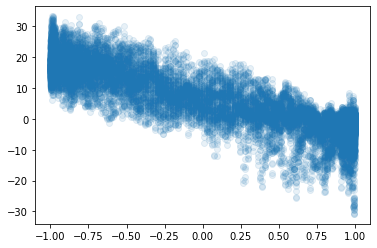

In [13]:
plt.scatter(data['cos_dayofyear'], data['T'], alpha=0.1) 

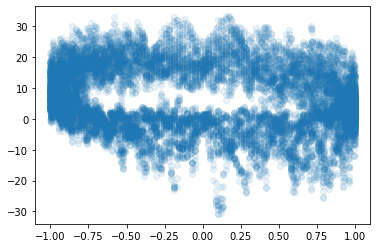

In [14]:
plt.scatter(data['sin_dayofyear'], data ['T'], alpha=0.1)

MAE on train set 4.023387789534363
MAE on test set 4.247049380054726


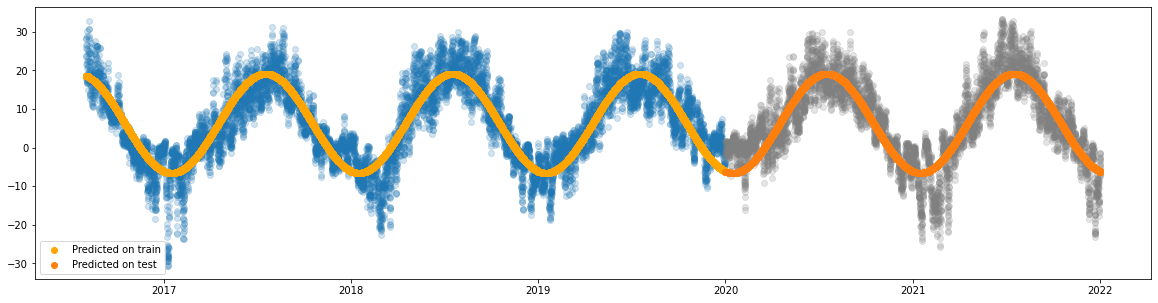

In [15]:
# learn the model

data_train = data[data['date'] < '2020-01-01']
data_test = data[data['date'] >= '2020-01-01']

factors = ['cos_dayofyear', 'sin_dayofyear'] 
X_train = data_train[factors]
X_test = data_test[factors]
y_train = data_train['T']
y_test = data_test['T']

model = LinearRegression() 
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.scatter(data_train['date'], data_train['T'], alpha=0.2)
plt.scatter(data_test['date'], data_test['T'], alpha=0.2, color='gray')
plt.scatter(data_train['date'], pred_train, label='Predicted on train', color='orange')
plt.scatter(data_test['date'], pred_test, label='Predicted on test')
plt.legend()

print('MAE on train set', mean_absolute_error(y_train, pred_train))
print('MAE on test set', mean_absolute_error(y_test, pred_test))

In [16]:
model.coef_, model.intercept_

(array([-12.47507099,  -3.06308178]), 6.262181126976783)